# Movie Studio Market Analysis

## ***Introduction***

## Stakeholder
Head of the New Movie Studio

## Problem Statement
Our company is launching a new movie studio and needs to decide what types of films to produce in order to maximize box office success. However, the company currently lacks historical knowledge about which movie characteristics lead to strong financial performance.

## BUSINESS UNDERSTANDING

***KEY QUESTIONS FOR MOVIE STUDIO STRATEGY***

1. **Which movie genres generate the highest revenue?**  
   By analyzing the total earnings from different genres, we can determine which types of films are more profitable and more likely to attract large audiences.

2. **Does movie rating or critic score affect performance?**  
   Using ratings from Rotten Tomatoes and IMDb, we can measure whether higher-rated movies tend to earn more revenue.

3. **Does a longer runtime affect ratings or revenue?**  
   By analyzing movie runtimes, we can identify whether certain runtimes generate higher earnings or better ratings across different genres.

4. **Does release timing affect earnings?**  
   By examining release months and their associated revenues, we can identify the optimal times of the year to launch films for maximum success.

###  ***Exploiting Joining for IMDB And Box Office Data***

 ### ***JOINING DATA EXPLOITATION***
   Using the Box Office and IMDB Datasets, We explore the data to investigate possible joins that can be used during our Analysis. The Columns (primary_title,start_year) on IMDB and (title,year) on Box Office data together, we see a successfull join using pandas hence a crucial step in Data Preparation.

In [56]:
# Import Libraries for use
import sqlite3
import pandas as pd
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Extracting Data For IMDB and Checking of Size(Loading of Data)
zip_path = r"C:\Users\HP\Documents\Project_Phase2\Movie-Studio-EDA-Project\zippedData\im.db.zip"
extract_path = r"C:\Users\HP\Documents\Project_Phase2\Movie-Studio-EDA-Project\zippedData"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print(os.path.getsize(
    r"C:\Users\HP\Documents\Project_Phase2\Movie-Studio-EDA-Project\zippedData\im.db"
))

#Connecting to the Database
db_path = r"C:\Users\HP\Documents\Project_Phase2\Movie-Studio-EDA-Project\zippedData\im.db"

imdb_conn = sqlite3.connect(db_path)

# Confirm by listing tables
tables = pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';",
    imdb_conn
)

tables





169443328


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [13]:
#Inspect Columns in Table movie_basics
pd.read_sql("PRAGMA table_info(movie_basics);", imdb_conn)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,primary_title,TEXT,0,None,0
2,2,original_title,TEXT,0,None,0
3,3,start_year,INTEGER,0,None,0
4,4,runtime_minutes,REAL,0,None,0
5,5,genres,TEXT,0,None,0


In [45]:
#Load Box Office Dataset
boxoffice_df = pd.read_csv(
    r"C:/Users/HP/Documents/Project_Phase2/Movie-Studio-EDA-Project/zippedData/bom.movie_gross.csv.gz"
)
boxoffice_df.head()
boxoffice_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [15]:
#Load Data into Pandas Dataframe
imdb_movies = pd.read_sql(
    """
    SELECT primary_title, start_year
    FROM movie_basics
    """,
    imdb_conn
)

imdb_movies.head()

,primary_title,start_year
0,Sunghursh,2013
1,One Day Before the Rainy Season,2019
2,The Other Side of the Wind,2018
3,Sabse Bada Sukh,2018
4,The Wandering Soap Opera,2017


In [16]:
# Perform the Join on (primary_title,start_year on IMDB Data and (title,year on Box Office Data))
merged_df = imdb_movies.merge(
    boxoffice_df,
    left_on=["primary_title", "start_year"],
    right_on=["title", "year"],
    how="inner"
)

merged_df.head()

,primary_title,start_year,title,studio,domestic_gross,foreign_gross,year
0,Wazir,2016,Wazir,Relbig.,1100000.0,NaN,2016
1,On the Road,2012,On the Road,IFC,744000.0,8000000,2012
2,The Secret Life of Walter Mitty,2013,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,A Walk Among the Tombstones,2014,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,Jurassic World,2015,Jurassic World,Uni.,652300000.0,"1,019.4",2015


In [17]:
# Validate Join
print("IMDb rows:", imdb_movies.shape[0])
print("Box Office rows:", boxoffice_df.shape[0])
print("Merged rows:", merged_df.shape[0])

IMDb rows: 146144
Box Office rows: 3387
Merged rows: 1873


### ***IMDB Basics Cleaning***
Use the columns (Genres, Runtime and Years) on the table Movie Basics to do the data cleaning to ensure Accuracy, Consistency and Reliability by Removing errors, duplicates and inconsistencies from the dataset.

In [18]:

# Reading into Movie Basics to check for Columns to Check Data Types
movie_basics_columns = pd.read_sql(
    "PRAGMA table_info(movie_basics);",
    imdb_conn
)

movie_basics_columns



,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,primary_title,TEXT,0,None,0
2,2,original_title,TEXT,0,None,0
3,3,start_year,INTEGER,0,None,0
4,4,runtime_minutes,REAL,0,None,0
5,5,genres,TEXT,0,None,0


In [19]:
# Load the actual movie_basics table to Get the Data
db_path = r"C:\Users\HP\Documents\Project_Phase2\Movie-Studio-EDA-Project\zippedData\im.db"  
conn = sqlite3.connect(db_path)


# Use SELECT * FROM movie_basics to get all rows
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# 3️⃣ Inspect the first few rows
print(movie_basics.head())
print(movie_basics.columns)

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


### ***Cleaning Performance***
- Replace N with NaN 
- Clean Genres, Runtime
- Filter Years


In [20]:
#Cleaning Genres Column
if 'genres' in movie_basics.columns:
    movie_basics['genres'] = (
        movie_basics['genres']
        .fillna('unknown')      # fill NaN with 'unknown'
        .astype(str)            # ensure all values are strings
        .str.strip()            # remove leading/trailing spaces
        .str.lower()            # lowercase everything
    )

In [21]:
# Create a list version of genres
movie_basics["genres_list"] = movie_basics["genres"].str.split(",")


In [22]:
#Clean runtime_minutes

movie_basics["runtime_minutes"] = pd.to_numeric(
    movie_basics["runtime_minutes"],
    errors="coerce"
)

In [23]:
# 8. Clean and filter start_year

movie_basics["start_year"] = pd.to_numeric(
    movie_basics["start_year"],
    errors="coerce"
)

In [24]:
# Filter movies between 2000 and 2023
movie_basics = movie_basics[
    (movie_basics["start_year"] >= 2000) &
    (movie_basics["start_year"] <= 2023)
]

In [25]:
# Conclusion of Data Cleaning on Movie Basics Performed
print("\nFinal Data Info:")
print(movie_basics.info())

print("\nFinal Preview:")
print(movie_basics.head())



Final Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 146138 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146138 non-null  object 
 1   primary_title    146138 non-null  object 
 2   original_title   146117 non-null  object 
 3   start_year       146138 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           146138 non-null  object 
 6   genres_list      146138 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.9+ MB
None

Final Preview:
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse

### ***EDA Rating Analysis***


In [31]:
#Load Movie Ratings Table and Preview the Data
movie_ratings = pd.read_sql(
    "SELECT * FROM movie_ratings;",
    conn
)
movie_ratings.head()



,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [66]:
#Merge Movie_Basics to Movie_Rating
imdb_df = pd.read_sql("""
SELECT b.primary_title,
       r.averagerating,
       r.numvotes
FROM movie_basics b
JOIN movie_ratings r
ON b.movie_id = r.movie_id
""", conn)


In [67]:
# Remove commas and convert to numeric for Revenue Computing
boxoffice_df["domestic_gross"] = (
    boxoffice_df["domestic_gross"]
    .replace(",", "", regex=True)
    .astype(float)
)

boxoffice_df["foreign_gross"] = (
    boxoffice_df["foreign_gross"]
    .replace(",", "", regex=True)
    .astype(float)
)

#Compute Total Revenue
boxoffice_df["revenue"] = (
    boxoffice_df["domestic_gross"] + boxoffice_df["foreign_gross"]
)


### ***Handling Missing Values***

In [68]:
boxoffice_df[["domestic_gross", "foreign_gross"]] = (
    boxoffice_df[["domestic_gross", "foreign_gross"]].fillna(0)
)

boxoffice_df["revenue"] = (
    boxoffice_df["domestic_gross"] + boxoffice_df["foreign_gross"]
)


In [69]:
#Validate Data Cleaning
boxoffice_df[["domestic_gross", "foreign_gross", "revenue"]].head()


,domestic_gross,foreign_gross,revenue
0,415000000.0,652000000.0,1.067000e+09
1,334200000.0,691300000.0,1.025500e+09
2,296000000.0,664300000.0,9.603000e+08
3,292600000.0,535700000.0,8.283000e+08
4,238700000.0,513900000.0,7.526000e+08


In [74]:
# Standardize titles
imdb_df["primary_title"] = imdb_df["primary_title"].str.lower().str.strip()
boxoffice_df["title"] = boxoffice_df["title"].str.lower().str.strip()

# Convert revenue to numeric
boxoffice_df["revenue"] = pd.to_numeric(boxoffice_df["revenue"], errors="coerce")

# Merge
merged_df = pd.merge(
    imdb_df,
    boxoffice_df,
    left_on="primary_title",
    right_on="title",
    how="inner"
)

# Drop missing values
merged_df = merged_df.dropna(subset=["averagerating", "revenue"])


# ***Corelation Analysis***


In [73]:
#≈ 0.0 → no relationship

#0.2 – 0.4 → weak positive correlation

#0.4 – 0.6 → moderate positive correlation

#> 0.6 → strong relationship
correlation = merged_df["averagerating"].corr(merged_df["revenue"])
correlation


0.1185915705350557

### ***Corelation Findings Explained***
The analysis shows a weak positive correlation (≈0.12) between IMDb ratings and box office revenue, indicating that higher-rated movies tend to earn slightly more, though other factors likely have a larger impact on financial success.

# ***Scatter Plot IMDB Rating Vs Revenue***


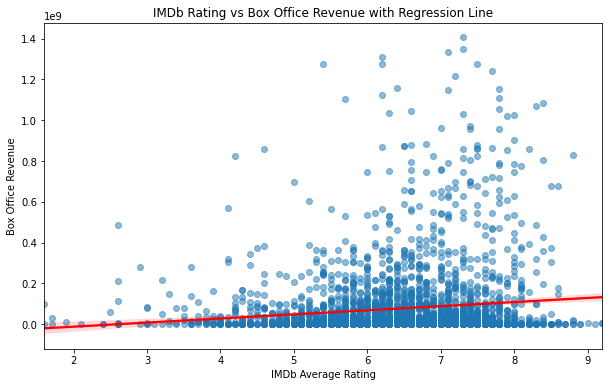

In [76]:
plt.figure(figsize=(10,6))

# Scatter with regression line.It gives a trend of revenue with rating.
sns.regplot(
    x="averagerating",
    y="revenue",
    data=merged_df,
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"}
)

plt.xlabel("IMDb Average Rating")
plt.ylabel("Box Office Revenue")
plt.title("IMDb Rating vs Box Office Revenue with Regression Line")
plt.show()



#### *Scatter Plot Findings Explained*
The scatter plot of IMDb ratings vs box office revenue, with a regression line, shows a weak positive trend, indicating that higher-rated movies tend to earn slightly more revenue

#### ***RECOMMENDATIONS AFTER ANALYSIS***
1. **Leverage Ratings, but Don’t Rely on Them Alone**

Analysis shows a weak to moderate positive correlation between IMDb ratings and revenue.

Higher ratings slightly increase revenue potential, but blockbuster franchises or major marketing campaigns often override ratings.

Recommendation: Use ratings as one of several metrics in forecasting, but also consider franchise strength, star power, and marketing spend
